# Chapter 4: MNIST Basics

In [2]:
import cv2
import torch
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
from matplotlib import pyplot as plt

### 1) How is a grayscale image represented on a computer? How about a color image?

Each pixel of a grayscale image can be represented as an integer valued scalar in the range of 0 (white) to 255 (black), as follows.

In [4]:
df = pd.DataFrame({range(0,255,5)})
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys', axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250


Thus, we can stack each row of a grayscale image to represent it as a single column vector. 

Similarly, since images can be decomposed to RBG, we can decompose color images to 3 column vectors regresenting the red, green, and blue of each pixel. In this case, if r, g, b represent those vectors, we have (r(i), g(i), b(i)) as the RBG triplet for pixel i. We can use the cv2 function 'imread' to easily convert an image to a rank-3 numpy array (as described) which uniquely represents the image.

In [21]:
image = cv2.imread("Pictures/Rainbow.png")

type(image)
image.shape

(491, 1161, 3)

Now, we can convert back to the image using the pyplot function 'imshow'!

(-0.5, 1160.5, 490.5, -0.5)

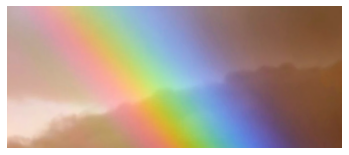

In [30]:
plt.imshow(image)
plt.axis('off')

### 2) How are the files and folders in the MNIST_SAMPLE dataset structured? Why?

As is comomonplace in classification datasets, we have seperate folders for train/validation sets, each with further subfolders which are named accoring to their target label. 

For example, in the MNIST dataset, the 35<sup>th</sup> training image of a '2' has the path **"train/2/35.png"**. It's imperative that the labels are accessible during training so loss can be calculated.

### 3) Explain how the "pixel similarity" approach to classifying digits works.

'Pixel similarity' is a primitive approach to doing classification on the MNIST dataset. If we wish to classify 3's and 7's, we first find the 'average 3' and 'average 7', and classify an unseen image according to which it's more similar to.

More formally, given that the images are 28*28 and grayscale, we can define a metric space $ (X,d) $ as follows. 

> Let $ X = {\mathbb{Z}_{\geq 0}}^{28*28} $. Define a metric $ d(x_1,x_2) $ on $ X $ to be the sum of pointwise distances between $ x_1 $ and $ x_2 $. Then, after calculating $avg_3$ and $avg_7$, classify $x\in X$ as...

$$ f(x)=argmin_{i\in\{3, 7\}}d(x, avg_i)$$

This serves as our **baseline** model, with more complex models we should expect at least as good performance. For a more advanced model, we need a loss function to determine *how* to improve.

### 4) What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.

List and dictionary comprehensions are a wonderful feature of Python — they are part of **"idiomatic Python"**. But programmers coming from other languages may have never seen them before. There are a lot of great tutorials just a web search away, so we won't spend a long time discussing them now. Here is a quick explanation and example to get you started. A list comprehension looks like this: 

<center> new_list = [f(o) for o in a_list if o>0] <\center>

This will return every element of a_list that is greater than 0, after passing it to the function f. There are three parts here: the collection you are iterating over (a_list), an optional filter (if o>0), and something to do to each element (f(o)). It's not only shorter to write but way faster than the alternative ways of creating the same list with a loop. For example,

In [36]:
a_list = [1, 3, 4, 12, 9, 31, 8]
double_odds = [2*i for i in a_list if i%2==1]
double_odds

[2, 6, 18, 62]

### 5) What is a "rank-3 tensor"?

A rank-3 tensor $A$ is simply a '3-dimentional' tensor. This means each element is listed by 3 indexes, $A_{i,j,k}$. Another way to consider a rank-3 tensor is as a list of matrices.

![title](Pictures/Tensor.png)

### 6) What is the difference between tensor rank and shape? How do you get the rank from the shape?

Rank is the number of **dimensions**, while shape describes the **size** in each dimension! For example, if A is a chess board, then $ rank(A) =2 $ (i.e. A is a matrix), and $ shape(A) = (8,8) $.

It's then clear that $ len(shape(A)) = rank(A) $.

### 7) What are RMSE and L1 norm?


* Take the mean of the absolute value of differences (absolute value is the function that replaces negative values with positive values). This is called the mean absolute difference or **L1 norm**.

* Take the mean of the square of differences (which makes everything positive) and then take the square root (which undoes the squaring). This is called the root mean squared error (RMSE) or **L2 norm**.

Intuitively, L2 punishes outliers more than L1, whereas small deviations are excused. L1 punishes any deviation linearly with respect to its magnitude.

### 8) How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?

As loops are very slow in Python, it is best to **represent the operations as array operations** rather than looping through individual elements. If this can be done, then using NumPy or PyTorch will be thousands of times faster, as they use underlying C code which is much faster than pure Python. Even better, PyTorch allows you to run operations on GPU, which will have significant speedup if there are parallel operations that can be done.

### 9) Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.

In [9]:
tens1 = torch.Tensor(list(range(1,10))).view(3,3); print(tens1)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [8]:
tens2 = 2*tens1; print(tens2)

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])


In [10]:
tens2[1:,1:]

tensor([[10., 12.],
        [16., 18.]])

### 10) What is broadcasting?